In [ ]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

In [ ]:
subscription_key = '03783f82006d4dd29a2765006b63c33f'
face_api_url = 'https://labuser14face.cognitiveservices.azure.com/face/v1.0/detect'

#Class, Library, Package 대문자 관례
#지역변수, 파라메타 소문자로 관례
#addr, msg 줄임말은 배제
#두 단어가 합쳐지면 두 번째 단어는 대문자
#상수는 전체가 대문자
#상수는 전체가 대문자  const MAX_USER=100

image_url = 'http://image.koreatimes.com/article/2021/05/10/20210510094734601.jpg'


In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))

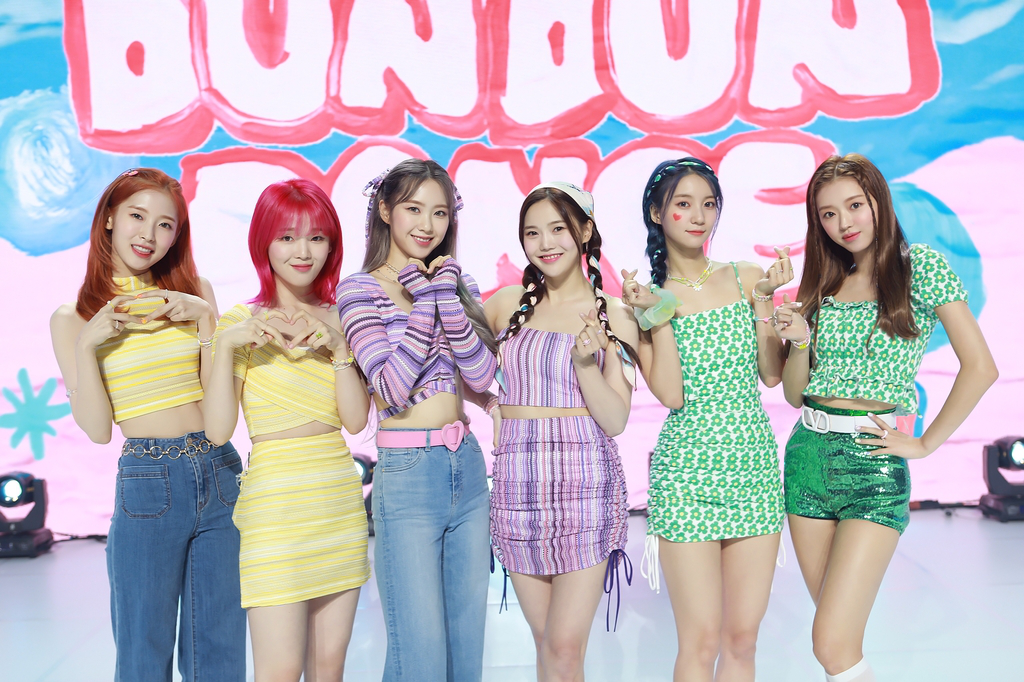

In [ ]:
image

In [ ]:
headers = {'Ocp-Apim-Subscription-Key' : subscription_key}

In [ ]:
params = {
    'returnFaceId': 'false',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'Smile'
}

In [ ]:
data = {'url' : image_url}

In [ ]:
response = requests.post(face_api_url, params=params, headers=headers, json=data)
faces = response.json()
faces

[{'faceRectangle': {'top': 203, 'left': 116, 'width': 63, 'height': 63},
  'faceAttributes': {'smile': 0.994}},
 {'faceRectangle': {'top': 193, 'left': 817, 'width': 59, 'height': 59},
  'faceAttributes': {'smile': 0.247}},
 {'faceRectangle': {'top': 222, 'left': 272, 'width': 59, 'height': 59},
  'faceAttributes': {'smile': 1.0}},
 {'faceRectangle': {'top': 196, 'left': 396, 'width': 56, 'height': 56},
  'faceAttributes': {'smile': 1.0}},
 {'faceRectangle': {'top': 189, 'left': 668, 'width': 56, 'height': 56},
  'faceAttributes': {'smile': 0.275}},
 {'faceRectangle': {'top': 215, 'left': 520, 'width': 56, 'height': 56},
  'faceAttributes': {'smile': 1.0}}]

In [ ]:
draw = ImageDraw.Draw(image)

In [ ]:
def DrawBox(faces):

  for face in faces:
    rect = face['faceRectangle']
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']

    draw.rectangle(((left,top),(left+width,top+height)),outline='red')

    face_attributes = face['faceAttributes']
    smile = face_attributes['smile']
    draw.text((left,top),str(smile),fill='red')

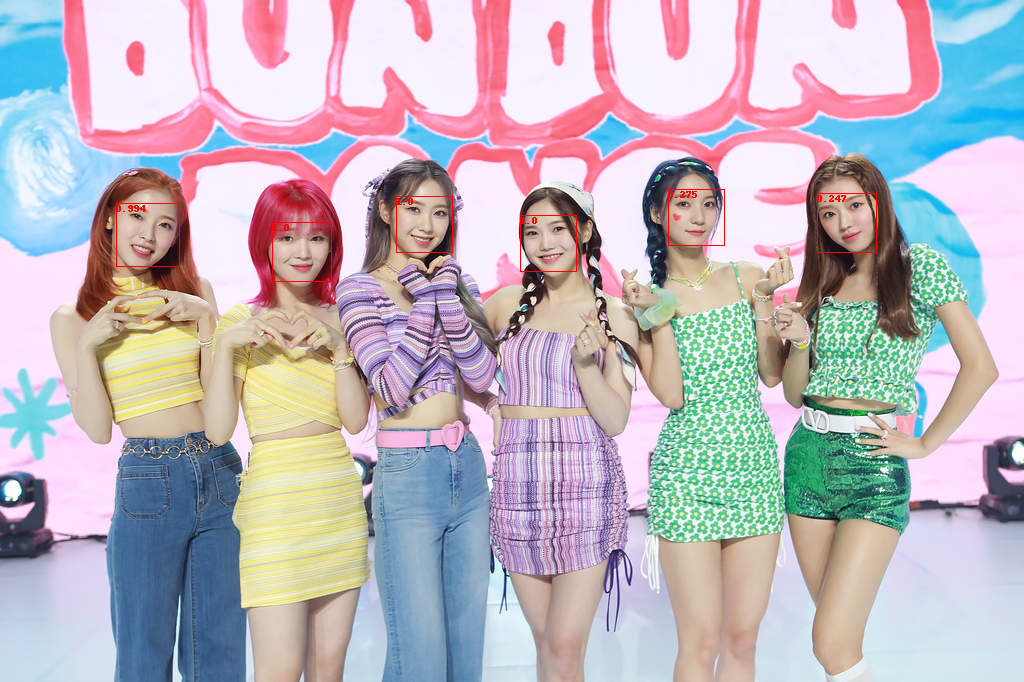

In [ ]:
DrawBox(faces)
image